In [48]:
import pandas as pd


data = pd.read_csv('weather_data_danang.csv')  
data.head()

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,showers,snow_depth,weather_code,cloud_cover,wind_speed_10m
0,2024-01-01T00:00,23.0,89,21.1,1015.0,0.0,0.0,0.0,3,98,3.3
1,2024-01-01T01:00,22.5,92,21.0,1014.7,0.0,0.0,0.0,3,100,1.8
2,2024-01-01T02:00,22.4,92,21.0,1014.0,0.1,0.0,0.0,51,100,2.1
3,2024-01-01T03:00,22.6,90,20.9,1013.6,0.1,0.0,0.0,51,100,2.4
4,2024-01-01T04:00,22.5,90,20.8,1013.4,0.1,0.0,0.0,51,98,3.4


In [49]:
data.columns

Index(['time', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'surface_pressure', 'rain', 'showers', 'snow_depth', 'weather_code',
       'cloud_cover', 'wind_speed_10m'],
      dtype='object')

STT,Tên cột,Ý nghĩa,Đơn vị thường dùng

1,time,Thời gian ghi nhận dữ liệu,ISO 8601 (Ngày/Giờ)

2,temperature_2m, Nhiệt độ không khí tại độ cao 2m so với mặt đất,°C hoặc °F

3,relative_humidity_2m, Độ ẩm tương đối (lượng hơi nước hiện có so với mức bão hòa),%

4,dew_point_2m, Điểm sương (nhiệt độ mà tại đó hơi nước ngưng tụ thành nước),°C hoặc °F

5,surface_pressure, Áp suất khí quyển tại bề mặt,hPa hoặc mbar

6,rain,     "Lượng mưa ổn định (diện rộng, kéo dài)",mm

7,showers,  "Mưa rào (mưa cục bộ, cường độ mạnh, nhanh)",mm

8,snow_depth,   Độ dày lớp tuyết bao phủ trên mặt đất,cm hoặc m

9,weather_code, Mã trạng thái thời tiết (Theo chuẩn WMO),Số nguyên (Integer)

10,cloud_cover, Tổng lượng mây che phủ bầu trời,%

11,wind_speed_10m,  Tốc độ gió tại độ cao tiêu chuẩn 10m,km/h hoặc m/s

In [50]:
for i in range(len(data.columns)):
    print(f"{data.columns[i]}: {data[data.columns[i]].isnull().sum()}")

time: 0
temperature_2m: 0
relative_humidity_2m: 0
dew_point_2m: 0
surface_pressure: 0
rain: 0
showers: 0
snow_depth: 0
weather_code: 0
cloud_cover: 0
wind_speed_10m: 0


In [51]:
for i in range(len(data.columns)):
    print(f"{data.columns[i]}: {data[data.columns[i]].value_counts()}")

time: time
2025-12-31T08:00    1
2025-12-31T09:00    1
2025-12-31T10:00    1
2025-12-31T11:00    1
2025-12-31T12:00    1
                   ..
2024-01-01T03:00    1
2024-01-01T04:00    1
2024-01-01T05:00    1
2024-01-01T06:00    1
2024-01-01T07:00    1
Name: count, Length: 17568, dtype: int64
temperature_2m: temperature_2m
25.5    307
25.0    299
27.0    295
24.5    288
26.0    270
       ... 
39.2      1
39.9      1
38.7      1
40.2      1
38.4      1
Name: count, Length: 233, dtype: int64
relative_humidity_2m: relative_humidity_2m
93    830
94    821
91    811
92    796
90    792
     ... 
34      4
33      3
31      2
35      1
32      1
Name: count, Length: 70, dtype: int64
dew_point_2m: dew_point_2m
24.5    546
25.0    532
24.0    530
23.5    435
24.6    419
       ... 
28.3      1
13.7      1
11.0      1
12.8      1
11.8      1
Name: count, Length: 163, dtype: int64
surface_pressure: surface_pressure
1004.5    136
1006.2    133
1006.4    132
1004.7    132
1004.8    132
         .

In [ ]:

for i in range(len(data.columns)):
    print(f"{data.columns[i]}: {data[data.columns[i]].unique()}")


time: ['2024-01-01T00:00' '2024-01-01T01:00' '2024-01-01T02:00' ...
 '2026-01-01T21:00' '2026-01-01T22:00' '2026-01-01T23:00']
temperature_2m: [23.  22.5 22.4 22.6 22.9 21.6 23.5 23.9 24.8 25.2 25.3 25.1 24.7 24.2
 23.4 22.7 23.1 22.8 23.2 23.8 24.  24.5 23.3 21.9 21.5 22.3 24.9 23.6
 22.1 22.  21.8 21.  21.1 20.8 20.9 20.6 21.4 24.3 25.  24.4 22.2 21.2
 20.4 19.9 19.3 19.8 19.6 21.7 20.7 23.7 24.1 24.6 21.3 20.1 20.  19.5
 18.8 19.  20.2 25.6 25.9 25.8 25.4 25.5 20.5 19.7 19.4 19.2 19.1 18.9
 18.4 18.1 17.6 20.3 18.7 26.3 26.2 26.  26.1 26.6 26.8 26.5 27.4 27.
 26.4 26.9 26.7 27.2 27.1 27.5 28.4 28.1 27.8 28.  28.5 28.6 27.7 25.7
 27.9 27.6 29.8 31.8 32.  31.1 28.9 28.7 31.7 33.5 33.7 33.  30.5 29.2
 28.3 27.3 28.8 28.2 29.  29.4 29.5 29.1 29.3 30.  30.1 30.3 29.7 30.7
 31.6 32.6 32.7 32.3 31.5 30.8 29.9 30.6 34.3 31.9 31.2 30.2 32.8 34.
 29.6 31.  32.5 32.2 31.4 32.1 31.3 30.4 30.9 32.4 33.8 34.5 33.6 32.9
 35.7 33.3 33.2 35.2 34.6 33.9 36.1 36.5 37.9 38.3 37.1 36.  34.8 34.2
 33.1 3

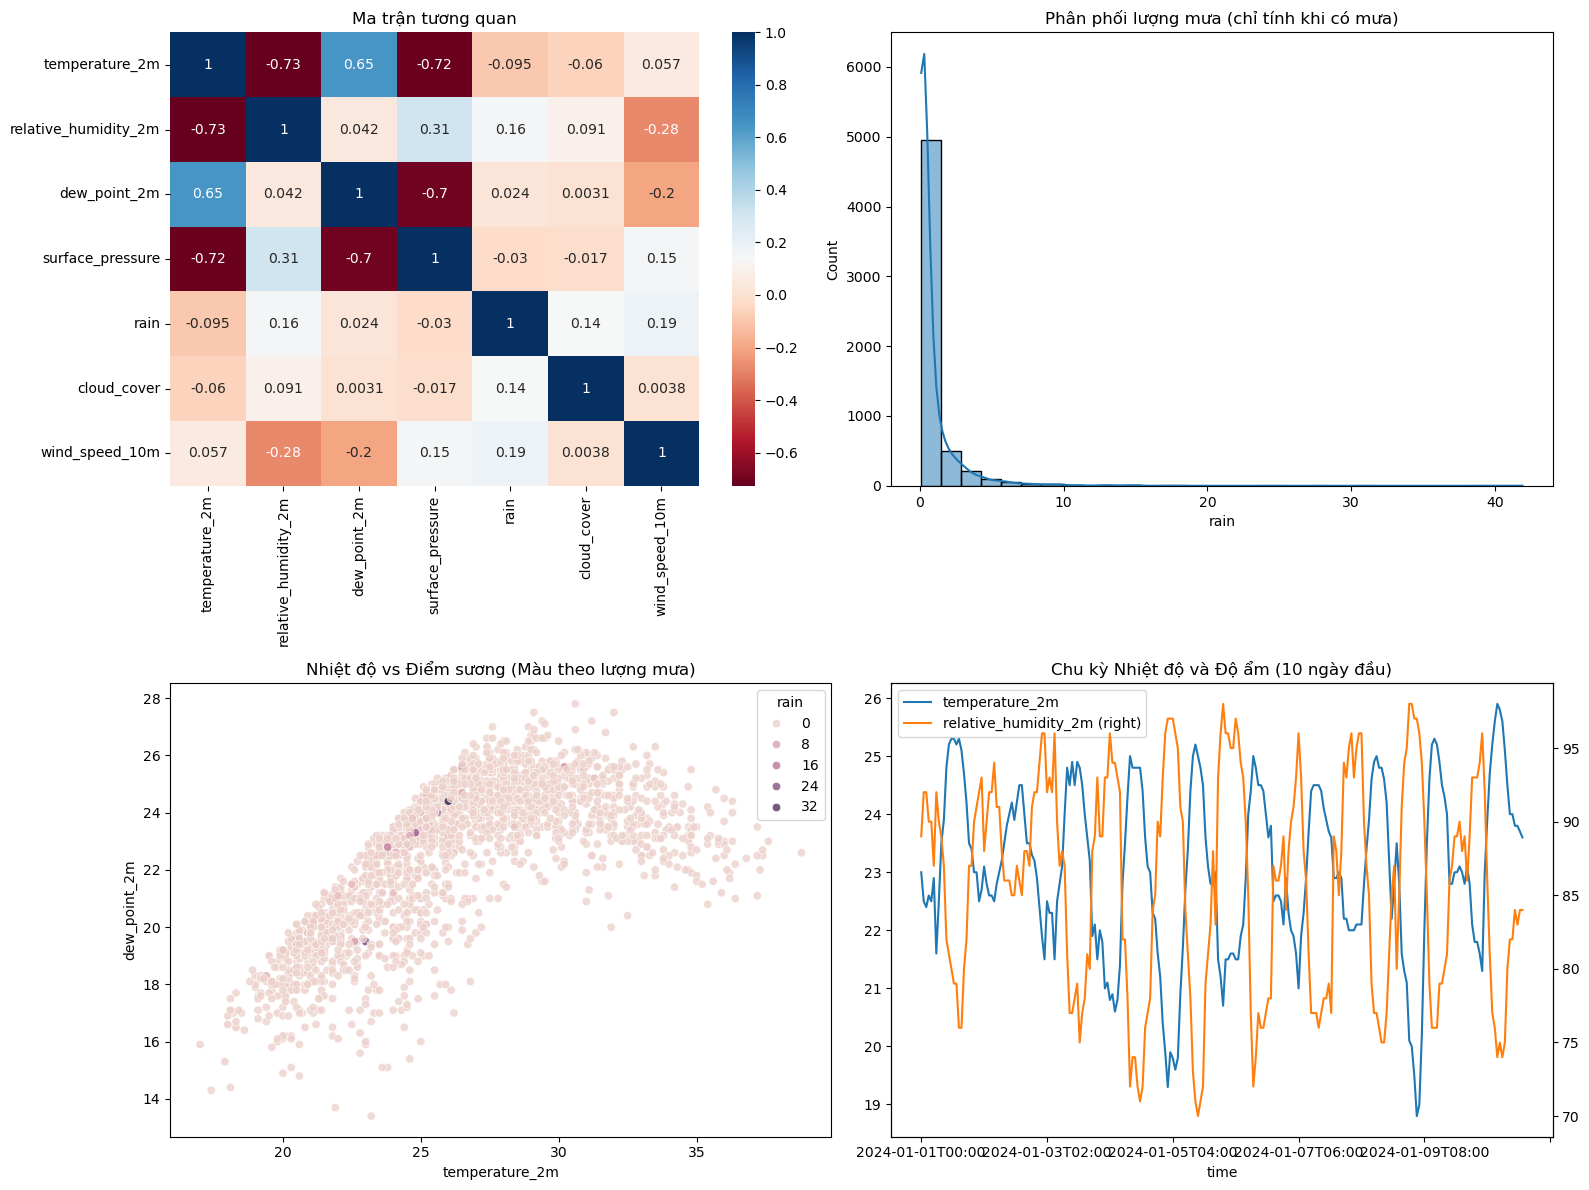

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

cols_to_viz = ['temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'surface_pressure', 'rain', 'cloud_cover', 'wind_speed_10m']
sns.heatmap(data[cols_to_viz].corr(), annot=True, cmap='RdBu', ax=axes[0,0])
axes[0,0].set_title("Ma trận tương quan")

sns.histplot(data[data['rain'] > 0]['rain'], bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title("Phân phối lượng mưa (chỉ tính khi có mưa)")

# 3. Quan hệ Temp vs Dew Point
sns.scatterplot(data=data.sample(2000), x='temperature_2m', y='dew_point_2m', hue='rain', ax=axes[1,0], alpha=0.8)
axes[1,0].set_title("Nhiệt độ vs Điểm sương (Màu theo lượng mưa)")

data[:240].plot(x='time', y=['temperature_2m', 'relative_humidity_2m'], secondary_y='relative_humidity_2m', ax=axes[1,1])
axes[1,1].set_title("Chu kỳ Nhiệt độ và Độ ẩm (10 ngày đầu)")

plt.tight_layout()
plt.show()

In [54]:
# --- FIX: Tạo các đặc trưng (Feature Engineering) cần thiết để vẽ biểu đồ ---
# Vì phần xử lý dữ liệu nằm ở dưới, chúng ta cần tạo tạm các cột này để visualization hoạt động

data['time'] = pd.to_datetime(data['time'])

# 1. Tạo cột 'month' và 'hour' (quan trọng cho pivot_table)
if 'month' not in data.columns:
    data['month'] = data['time'].dt.month
if 'hour' not in data.columns:
    data['hour'] = data['time'].dt.hour

# 2. Tạo nhóm thời tiết 'weather_group'
if 'weather_group' not in data.columns:
    def group_weather(code):
        if code <= 3: return 'Cloudy'
        if code <= 55: return 'Drizzle'
        if code <= 65: return 'Rain'
        return 'Storm/Other'
    data['weather_group'] = data['weather_code'].apply(group_weather)

# 3. Tạo 'dew_point_gap'
if 'dew_point_gap' not in data.columns:
    data['dew_point_gap'] = data['temperature_2m'] - data['dew_point_2m']

# 4. Tạo Lag feature cho biểu đồ regplot
if 'temperature_2m_lag1' not in data.columns:
    data['temperature_2m_lag1'] = data['temperature_2m'].shift(1)

# 5. Tạo 'pressure_trend_6h' nếu chưa có (cho biểu đồ scatterplot)
if 'pressure_trend_6h' not in data.columns:
    data['pressure_trend_6h'] = data['surface_pressure'].diff(6)

print("Đã tạo bổ sung các cột: month, hour, weather_group, dew_point_gap, temperature_2m_lag1, pressure_trend_6h")

Đã tạo bổ sung các cột: month, hour, weather_group, dew_point_gap, temperature_2m_lag1, pressure_trend_6h


C:\Users\t\AppData\Local\Temp\ipykernel_13732\1848356397.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='weather_group', y='dew_point_gap', palette='muted')


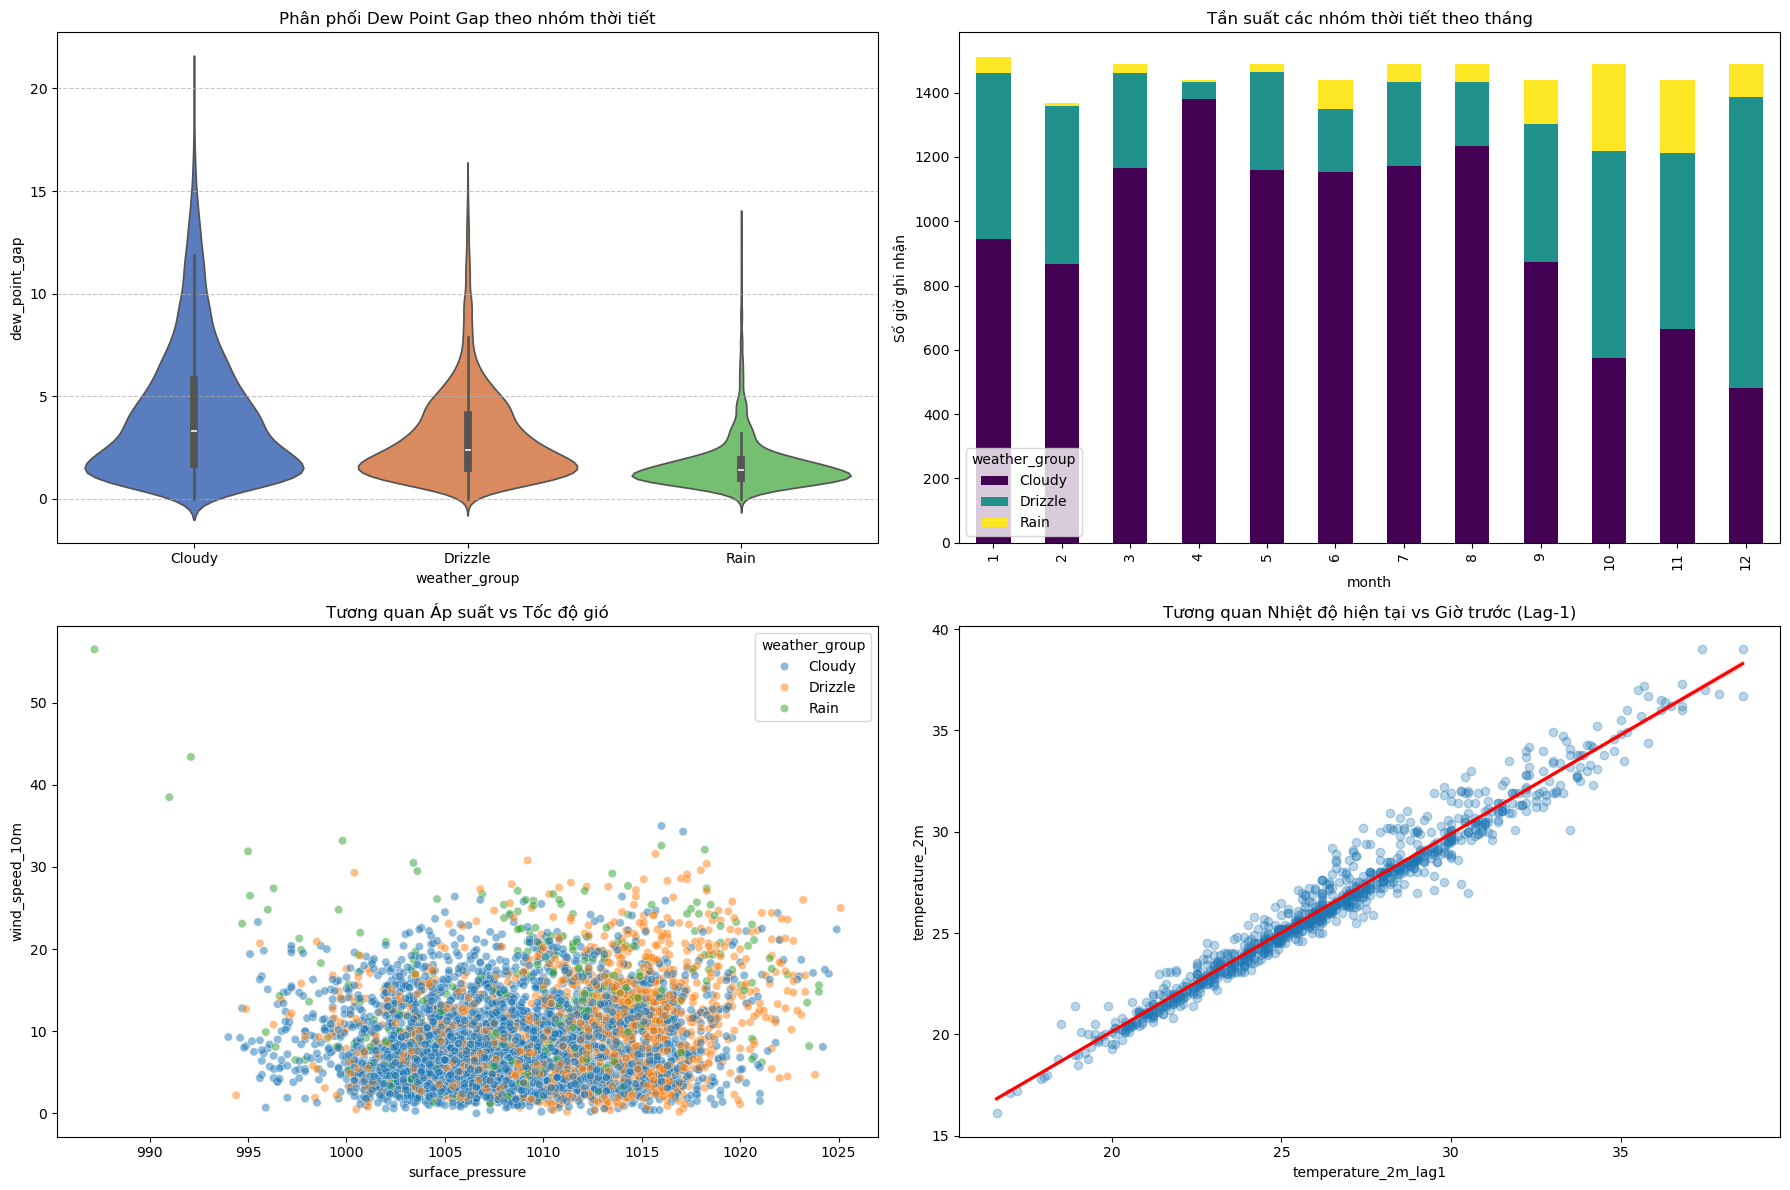

In [55]:

plt.figure(figsize=(18, 12)) 

# 1. Violin Plot cho Dew Point Gap (Kiểm tra đặc trưng quan trọng nhất)
plt.subplot(2, 2, 1) # 
sns.violinplot(data=data, x='weather_group', y='dew_point_gap', palette='muted')
plt.title("Phân phối Dew Point Gap theo nhóm thời tiết")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 2. Biểu đồ cột chồng theo tháng (Tính mùa vụ tại Đà Nẵng)
plt.subplot(2, 2, 2)
monthly_weather = data.groupby(['month', 'weather_group']).size().unstack()
monthly_weather.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
plt.title("Tần suất các nhóm thời tiết theo tháng")
plt.ylabel("Số giờ ghi nhận")

# 3. Mối quan hệ giữa Gió và Áp suất (Nhận diện bão)
plt.subplot(2, 2, 3)
sns.scatterplot(data=data.sample(min(5000, len(data))), x='surface_pressure', y='wind_speed_10m', 
                hue='weather_group', alpha=0.5)
plt.title("Tương quan Áp suất vs Tốc độ gió")

# 4. Đặc trưng trễ (Lag Feature) - Kiểm tra tính liên tục
plt.subplot(2, 2, 4)
sns.regplot(data=data.sample(min(1000, len(data))), x='temperature_2m_lag1', y='temperature_2m', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Tương quan Nhiệt độ hiện tại vs Giờ trước (Lag-1)")

plt.tight_layout()
plt.show()

C:\Users\t\AppData\Local\Temp\ipykernel_13732\3761511108.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='weather_group', y='surface_pressure', palette='Set2')
C:\Users\t\AppData\Local\Temp\ipykernel_13732\3761511108.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['wind_speed_10m'], label=group, shade=True)
C:\Users\t\AppData\Local\Temp\ipykernel_13732\3761511108.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['wind_speed_10m'], label=group, shade=True)
C:\Users\t\AppData\Local\Temp\ipykernel_13732\3761511108.py:24: FutureWarning: 

`shade` is now depre

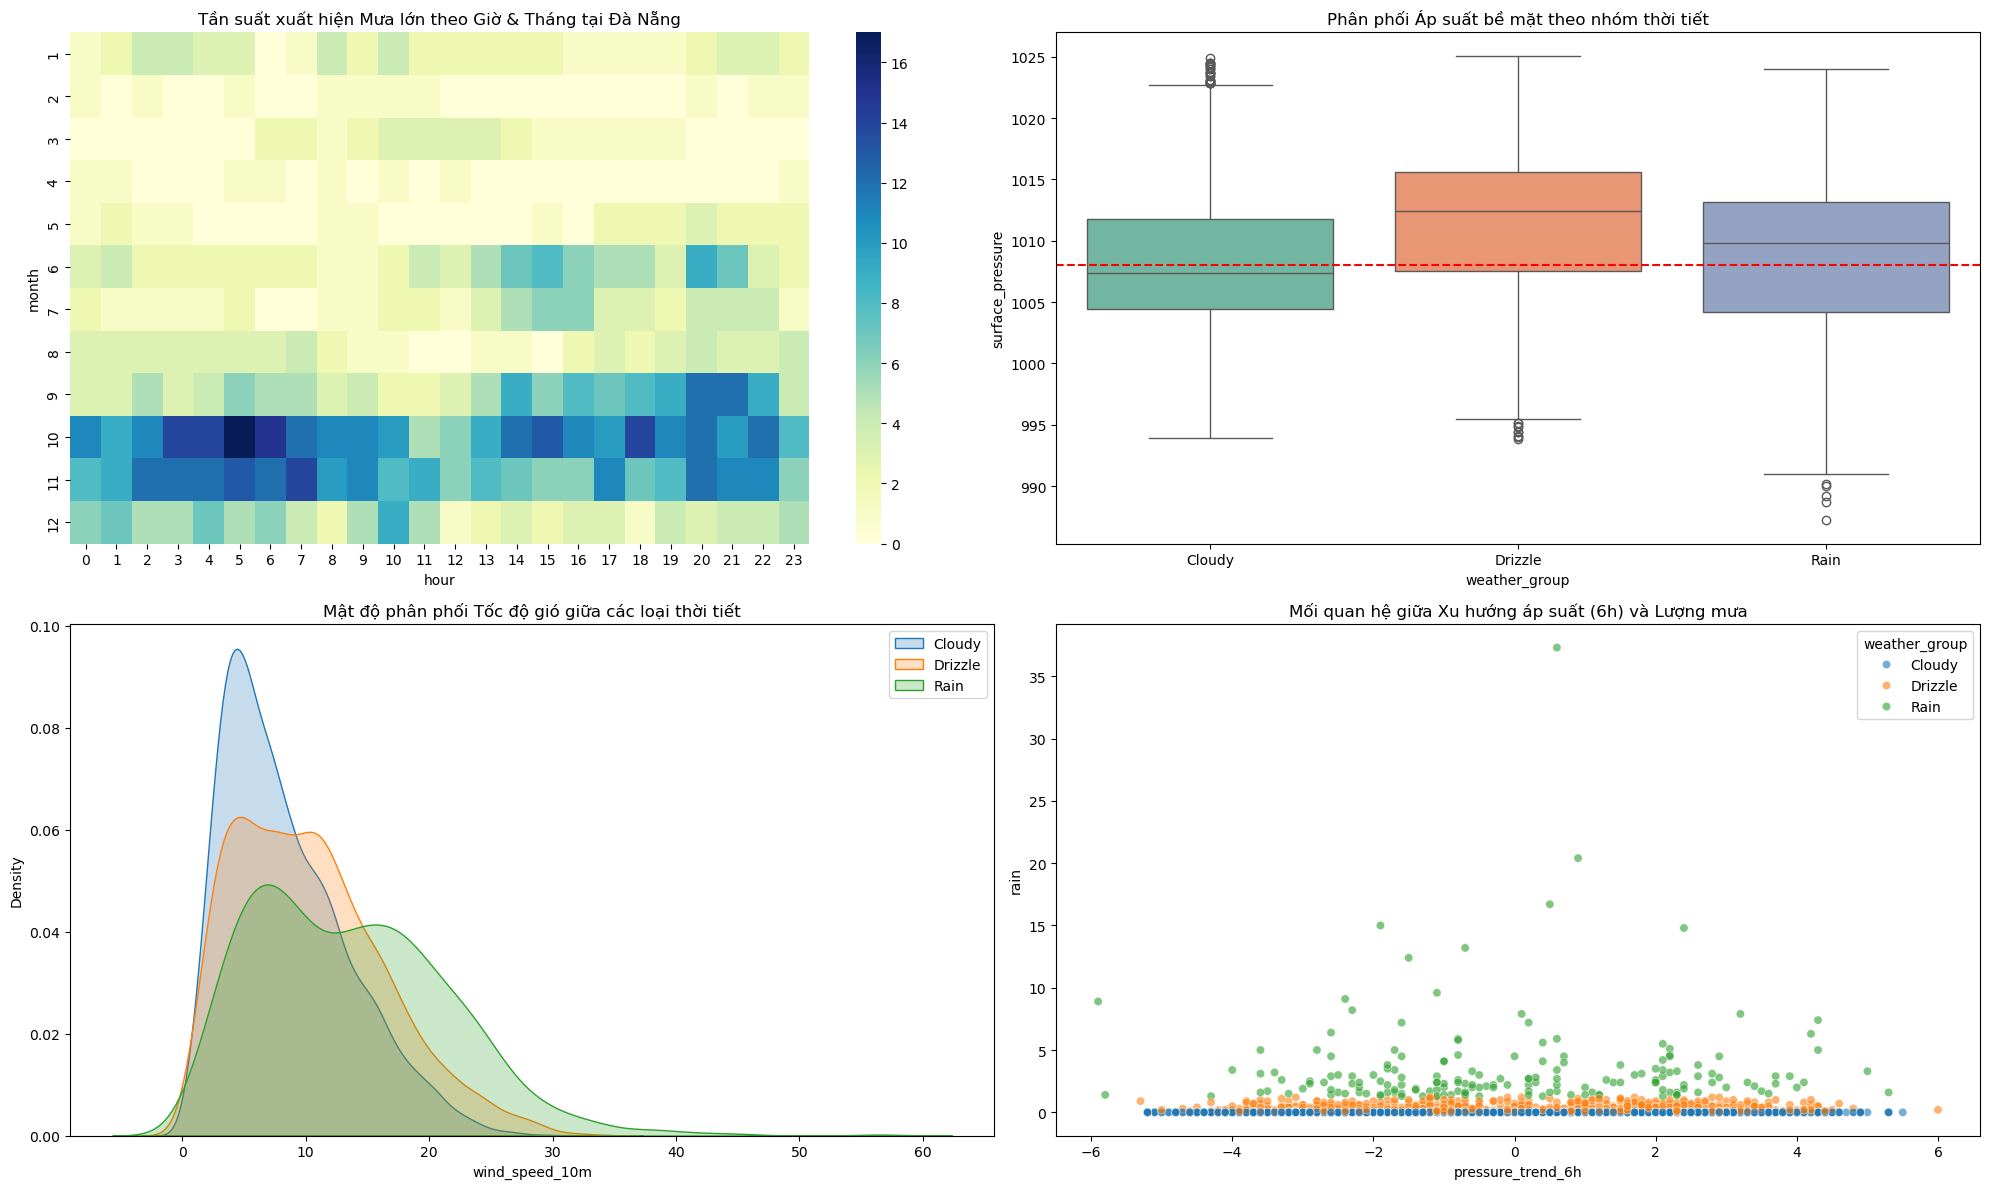

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))

# 1. Heatmap tần suất Mưa theo Giờ và Tháng
plt.subplot(2, 2, 1)
rain_freq = data[data['weather_group'] == 'Rain'].pivot_table(
    index='month', columns='hour', values='temperature_2m', aggfunc='count'
).fillna(0)
sns.heatmap(rain_freq, cmap='YlGnBu', annot=False)
plt.title("Tần suất xuất hiện Mưa lớn theo Giờ & Tháng tại Đà Nẵng")

# 2. Boxplot so sánh Áp suất giữa các nhóm (Tìm ngưỡng bão)
plt.subplot(2, 2, 2)
sns.boxplot(data=data, x='weather_group', y='surface_pressure', palette='Set2')
plt.axhline(y=1008, color='red', linestyle='--', label='Ngưỡng áp suất thấp') # Ví dụ ngưỡng
plt.title("Phân phối Áp suất bề mặt theo nhóm thời tiết")

# 3. Biểu đồ mật độ (KDE) cho Tốc độ gió
plt.subplot(2, 2, 3)
for group in data['weather_group'].unique():
    subset = data[data['weather_group'] == group]
    sns.kdeplot(subset['wind_speed_10m'], label=group, shade=True)
plt.title("Mật độ phân phối Tốc độ gió giữa các loại thời tiết")
plt.legend()

# 4. Tương quan giữa Biến động áp suất 6h và Lượng mưa
plt.subplot(2, 2, 4)
sns.scatterplot(data=data.sample(min(3000, len(data))), 
                x='pressure_trend_6h', y='rain', hue='weather_group', alpha=0.6)
plt.title("Mối quan hệ giữa Xu hướng áp suất (6h) và Lượng mưa")

plt.tight_layout()
plt.show()

In [57]:
data['time'] = pd.to_datetime(data['time'])
data['hour'] = data['time'].dt.hour
data['month'] = data['time'].dt.month
data.head()

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,showers,snow_depth,weather_code,cloud_cover,wind_speed_10m,month,hour,weather_group,dew_point_gap,temperature_2m_lag1,pressure_trend_6h
0,2024-01-01 00:00:00,23.0,89,21.1,1015.0,0.0,0.0,0.0,3,98,3.3,1,0,Cloudy,1.9,NaN,NaN
1,2024-01-01 01:00:00,22.5,92,21.0,1014.7,0.0,0.0,0.0,3,100,1.8,1,1,Cloudy,1.5,23.0,NaN
2,2024-01-01 02:00:00,22.4,92,21.0,1014.0,0.1,0.0,0.0,51,100,2.1,1,2,Drizzle,1.4,22.5,NaN
3,2024-01-01 03:00:00,22.6,90,20.9,1013.6,0.1,0.0,0.0,51,100,2.4,1,3,Drizzle,1.7,22.4,NaN
4,2024-01-01 04:00:00,22.5,90,20.8,1013.4,0.1,0.0,0.0,51,98,3.4,1,4,Drizzle,1.7,22.6,NaN


In [58]:
data['weather_code'].value_counts()

weather_code
3     7187
51    3705
0     1871
1     1453
2     1160
53     887
61     518
63     455
55     250
65      82
Name: count, dtype: int64

In [59]:
data.groupby('weather_code')['rain'].mean()

weather_code
0      0.000000
1      0.000000
2      0.000000
3      0.000000
51     0.187530
53     0.656257
55     1.094400
61     1.775676
63     3.978462
65    13.167073
Name: rain, dtype: float64

In [60]:
def group_weather(code):
    if code <= 3: return 'Cloudy'
    if code <= 55: return 'Drizzle'
    if code <= 65: return 'Rain'

data['weather_group'] = data['weather_code'].apply(group_weather)
data.head()

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,showers,snow_depth,weather_code,cloud_cover,wind_speed_10m,month,hour,weather_group,dew_point_gap,temperature_2m_lag1,pressure_trend_6h
0,2024-01-01 00:00:00,23.0,89,21.1,1015.0,0.0,0.0,0.0,3,98,3.3,1,0,Cloudy,1.9,NaN,NaN
1,2024-01-01 01:00:00,22.5,92,21.0,1014.7,0.0,0.0,0.0,3,100,1.8,1,1,Cloudy,1.5,23.0,NaN
2,2024-01-01 02:00:00,22.4,92,21.0,1014.0,0.1,0.0,0.0,51,100,2.1,1,2,Drizzle,1.4,22.5,NaN
3,2024-01-01 03:00:00,22.6,90,20.9,1013.6,0.1,0.0,0.0,51,100,2.4,1,3,Drizzle,1.7,22.4,NaN
4,2024-01-01 04:00:00,22.5,90,20.8,1013.4,0.1,0.0,0.0,51,98,3.4,1,4,Drizzle,1.7,22.6,NaN


In [61]:
data['weather_group'].value_counts()

weather_group
Cloudy     11671
Drizzle     4842
Rain        1055
Name: count, dtype: int64

In [62]:
data

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,showers,snow_depth,weather_code,cloud_cover,wind_speed_10m,month,hour,weather_group,dew_point_gap,temperature_2m_lag1,pressure_trend_6h
0,2024-01-01 00:00:00,23.0,89,21.1,1015.0,0.0,0.0,0.0,3,98,3.3,1,0,Cloudy,1.9,NaN,NaN
1,2024-01-01 01:00:00,22.5,92,21.0,1014.7,0.0,0.0,0.0,3,100,1.8,1,1,Cloudy,1.5,23.0,NaN
2,2024-01-01 02:00:00,22.4,92,21.0,1014.0,0.1,0.0,0.0,51,100,2.1,1,2,Drizzle,1.4,22.5,NaN
3,2024-01-01 03:00:00,22.6,90,20.9,1013.6,0.1,0.0,0.0,51,100,2.4,1,3,Drizzle,1.7,22.4,NaN
4,2024-01-01 04:00:00,22.5,90,20.8,1013.4,0.1,0.0,0.0,51,98,3.4,1,4,Drizzle,1.7,22.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17563,2026-01-01 19:00:00,22.5,76,18.1,1014.6,0.0,0.0,0.0,3,85,9.3,1,19,Cloudy,4.4,22.9,1.7
17564,2026-01-01 20:00:00,22.4,79,18.5,1015.3,0.0,0.0,0.0,2,65,3.6,1,20,Cloudy,3.9,22.5,2.8
17565,2026-01-01 21:00:00,22.0,81,18.5,1015.9,0.0,0.0,0.0,1,27,4.2,1,21,Cloudy,3.5,22.4,3.4
17566,2026-01-01 22:00:00,21.1,87,18.8,1016.0,0.0,0.0,0.0,0,16,4.4,1,22,Cloudy,2.3,22.0,3.4


In [63]:
# Tạo khung thời gian chuẩn
expected_range = pd.date_range(start=data['time'].min(), end=data['time'].max(), freq='H')

# Tìm các thời điểm có trong chuẩn nhưng không có trong dữ liệu của bạn
missing_times = expected_range.difference(data['time'])
print(f"Số lượng giờ bị thiếu: {len(missing_times)}")
print("Một số giờ bị thiếu đầu tiên:", missing_times[:5])

Số lượng giờ bị thiếu: 0
Một số giờ bị thiếu đầu tiên: DatetimeIndex([], dtype='datetime64[ns]', freq='h')


C:\Users\t\AppData\Local\Temp\ipykernel_13732\2383751855.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  expected_range = pd.date_range(start=data['time'].min(), end=data['time'].max(), freq='H')


In [64]:
data['time'] = pd.to_datetime(data['time']).dt.floor('H')

# 2. Loại bỏ các dòng trùng lặp (nếu có)
original_len = len(data)
data = data.drop_duplicates(subset=['time'])
print(f"Đã loại bỏ {original_len - len(data)} dòng trùng lặp.")

# 3. Sắp xếp lại theo thứ tự thời gian tăng dần
data = data.sort_values('time').reset_index(drop=True)

# 4. Kiểm tra lại lần cuối
expected_range = pd.date_range(start=data['time'].min(), end=data['time'].max(), freq='H')
print(f"Khớp hoàn toàn: {len(expected_range) == len(data)}")

Đã loại bỏ 0 dòng trùng lặp.
Khớp hoàn toàn: True


C:\Users\t\AppData\Local\Temp\ipykernel_13732\3562711797.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['time'] = pd.to_datetime(data['time']).dt.floor('H')
C:\Users\t\AppData\Local\Temp\ipykernel_13732\3562711797.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  expected_range = pd.date_range(start=data['time'].min(), end=data['time'].max(), freq='H')


Feature Engineering

In [65]:
for col in ['temperature_2m', 'relative_humidity_2m', 'surface_pressure']:
    data[f'{col}_lag1'] = data[col].shift(1)
    data[f'{col}_lag2'] = data[col].shift(2)

In [66]:
data['pressure_trend'] = data['surface_pressure'].diff(3)
data['humidity_change'] = data['relative_humidity_2m'].diff(1)

In [67]:
import numpy as np
data['hour_sin'] = np.sin(2*np.pi*data['hour']/24)
data['hour_cos'] = np.cos(2*np.pi*data['hour']/24)

In [68]:
data

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,showers,snow_depth,weather_code,cloud_cover,...,pressure_trend_6h,temperature_2m_lag2,relative_humidity_2m_lag1,relative_humidity_2m_lag2,surface_pressure_lag1,surface_pressure_lag2,pressure_trend,humidity_change,hour_sin,hour_cos
0,2024-01-01 00:00:00,23.0,89,21.1,1015.0,0.0,0.0,0.0,3,98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
1,2024-01-01 01:00:00,22.5,92,21.0,1014.7,0.0,0.0,0.0,3,100,...,NaN,NaN,89.0,NaN,1015.0,NaN,NaN,3.0,0.258819,0.965926
2,2024-01-01 02:00:00,22.4,92,21.0,1014.0,0.1,0.0,0.0,51,100,...,NaN,23.0,92.0,89.0,1014.7,1015.0,NaN,0.0,0.500000,0.866025
3,2024-01-01 03:00:00,22.6,90,20.9,1013.6,0.1,0.0,0.0,51,100,...,NaN,22.5,92.0,92.0,1014.0,1014.7,-1.4,-2.0,0.707107,0.707107
4,2024-01-01 04:00:00,22.5,90,20.8,1013.4,0.1,0.0,0.0,51,98,...,NaN,22.4,90.0,92.0,1013.6,1014.0,-1.3,0.0,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17563,2026-01-01 19:00:00,22.5,76,18.1,1014.6,0.0,0.0,0.0,3,85,...,1.7,23.8,76.0,70.0,1014.3,1013.3,2.0,0.0,-0.965926,0.258819
17564,2026-01-01 20:00:00,22.4,79,18.5,1015.3,0.0,0.0,0.0,2,65,...,2.8,22.9,76.0,76.0,1014.6,1014.3,2.0,3.0,-0.866025,0.500000
17565,2026-01-01 21:00:00,22.0,81,18.5,1015.9,0.0,0.0,0.0,1,27,...,3.4,22.5,79.0,76.0,1015.3,1014.6,1.6,2.0,-0.707107,0.707107
17566,2026-01-01 22:00:00,21.1,87,18.8,1016.0,0.0,0.0,0.0,0,16,...,3.4,22.4,81.0,79.0,1015.9,1015.3,1.4,6.0,-0.500000,0.866025


In [69]:
data.columns

Index(['time', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'surface_pressure', 'rain', 'showers', 'snow_depth', 'weather_code',
       'cloud_cover', 'wind_speed_10m', 'month', 'hour', 'weather_group',
       'dew_point_gap', 'temperature_2m_lag1', 'pressure_trend_6h',
       'temperature_2m_lag2', 'relative_humidity_2m_lag1',
       'relative_humidity_2m_lag2', 'surface_pressure_lag1',
       'surface_pressure_lag2', 'pressure_trend', 'humidity_change',
       'hour_sin', 'hour_cos'],
      dtype='object')

In [70]:
# Danh sách các cột cần loại bỏ khỏi X
drop_cols = ['time', 'rain', 'weather_code', 'weather_group']

X = data.drop(columns=drop_cols)
y = data['weather_group'].astype('category').cat.codes # Chuyển nhãn chữ sang số

print("Danh sách các đặc trưng cuối cùng:", X.columns.tolist())

Danh sách các đặc trưng cuối cùng: ['temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'surface_pressure', 'showers', 'snow_depth', 'cloud_cover', 'wind_speed_10m', 'month', 'hour', 'dew_point_gap', 'temperature_2m_lag1', 'pressure_trend_6h', 'temperature_2m_lag2', 'relative_humidity_2m_lag1', 'relative_humidity_2m_lag2', 'surface_pressure_lag1', 'surface_pressure_lag2', 'pressure_trend', 'humidity_change', 'hour_sin', 'hour_cos']


In [71]:
X.dropna()

,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,showers,snow_depth,cloud_cover,wind_speed_10m,month,hour,...,pressure_trend_6h,temperature_2m_lag2,relative_humidity_2m_lag1,relative_humidity_2m_lag2,surface_pressure_lag1,surface_pressure_lag2,pressure_trend,humidity_change,hour_sin,hour_cos
6,21.6,92,20.2,1014.4,0.0,0.0,100,4.3,1,6,...,-0.6,22.5,87.0,90.0,1013.9,1013.4,0.8,5.0,1.000000,6.123234e-17
7,22.5,90,20.9,1014.9,0.0,0.0,100,2.9,1,7,...,0.2,22.9,92.0,87.0,1014.4,1013.9,1.5,-2.0,0.965926,-2.588190e-01
8,23.5,89,21.5,1016.3,0.0,0.0,98,5.6,1,8,...,2.3,21.6,90.0,92.0,1014.9,1014.4,2.4,-1.0,0.866025,-5.000000e-01
9,23.9,87,21.6,1016.5,0.0,0.0,83,6.4,1,9,...,2.9,22.5,89.0,90.0,1016.3,1014.9,2.1,-2.0,0.707107,-7.071068e-01
10,24.8,82,21.6,1016.1,0.0,0.0,93,9.2,1,10,...,2.7,23.5,87.0,89.0,1016.5,1016.3,1.2,-5.0,0.500000,-8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17563,22.5,76,18.1,1014.6,0.0,0.0,85,9.3,1,19,...,1.7,23.8,76.0,70.0,1014.3,1013.3,2.0,0.0,-0.965926,2.588190e-01
17564,22.4,79,18.5,1015.3,0.0,0.0,65,3.6,1,20,...,2.8,22.9,76.0,76.0,1014.6,1014.3,2.0,3.0,-0.866025,5.000000e-01
17565,22.0,81,18.5,1015.9,0.0,0.0,27,4.2,1,21,...,3.4,22.5,79.0,76.0,1015.3,1014.6,1.6,2.0,-0.707107,7.071068e-01
17566,21.1,87,18.8,1016.0,0.0,0.0,16,4.4,1,22,...,3.4,22.4,81.0,79.0,1015.9,1015.3,1.4,6.0,-0.500000,8.660254e-01


In [72]:
# 1. Hiệu số điểm sương
data['dew_point_gap'] = data['temperature_2m'] - data['dew_point_2m']

# 2. Biến động áp suất trong 6 giờ (nhận diện bão xa)
data['pressure_trend_6h'] = data['surface_pressure'].diff(6)

# 3. Trung bình trượt độ ẩm 3 giờ
data['humidity_roll_mean_3h'] = data['relative_humidity_2m'].rolling(window=3).mean()

# 4. Loại bỏ NaN sau khi tạo Feature
data.dropna(inplace=True)

In [73]:
data.columns
len(data.columns)

27

In [74]:
data

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,showers,snow_depth,weather_code,cloud_cover,...,temperature_2m_lag2,relative_humidity_2m_lag1,relative_humidity_2m_lag2,surface_pressure_lag1,surface_pressure_lag2,pressure_trend,humidity_change,hour_sin,hour_cos,humidity_roll_mean_3h
6,2024-01-01 06:00:00,21.6,92,20.2,1014.4,0.1,0.0,0.0,51,100,...,22.5,87.0,90.0,1013.9,1013.4,0.8,5.0,1.000000,6.123234e-17,89.666667
7,2024-01-01 07:00:00,22.5,90,20.9,1014.9,0.3,0.0,0.0,51,100,...,22.9,92.0,87.0,1014.4,1013.9,1.5,-2.0,0.965926,-2.588190e-01,89.666667
8,2024-01-01 08:00:00,23.5,89,21.5,1016.3,0.1,0.0,0.0,51,98,...,21.6,90.0,92.0,1014.9,1014.4,2.4,-1.0,0.866025,-5.000000e-01,90.333333
9,2024-01-01 09:00:00,23.9,87,21.6,1016.5,0.2,0.0,0.0,51,83,...,22.5,89.0,90.0,1016.3,1014.9,2.1,-2.0,0.707107,-7.071068e-01,88.666667
10,2024-01-01 10:00:00,24.8,82,21.6,1016.1,0.1,0.0,0.0,51,93,...,23.5,87.0,89.0,1016.5,1016.3,1.2,-5.0,0.500000,-8.660254e-01,86.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17563,2026-01-01 19:00:00,22.5,76,18.1,1014.6,0.0,0.0,0.0,3,85,...,23.8,76.0,70.0,1014.3,1013.3,2.0,0.0,-0.965926,2.588190e-01,74.000000
17564,2026-01-01 20:00:00,22.4,79,18.5,1015.3,0.0,0.0,0.0,2,65,...,22.9,76.0,76.0,1014.6,1014.3,2.0,3.0,-0.866025,5.000000e-01,77.000000
17565,2026-01-01 21:00:00,22.0,81,18.5,1015.9,0.0,0.0,0.0,1,27,...,22.5,79.0,76.0,1015.3,1014.6,1.6,2.0,-0.707107,7.071068e-01,78.666667
17566,2026-01-01 22:00:00,21.1,87,18.8,1016.0,0.0,0.0,0.0,0,16,...,22.4,81.0,79.0,1015.9,1015.3,1.4,6.0,-0.500000,8.660254e-01,82.333333


In [75]:
data.describe()

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,showers,snow_depth,weather_code,cloud_cover,...,temperature_2m_lag2,relative_humidity_2m_lag1,relative_humidity_2m_lag2,surface_pressure_lag1,surface_pressure_lag2,pressure_trend,humidity_change,hour_sin,hour_cos,humidity_roll_mean_3h
count,17562,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.0,17562.0,17562.000000,17562.000000,...,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,1.756200e+04,17562.000000
mean,2025-01-01 02:30:00,26.353325,81.299909,22.628755,1009.070601,0.305193,0.0,0.0,19.384637,77.911400,...,26.353525,81.299795,81.299966,1009.070487,1009.070339,0.000393,0.000114,-0.000188,-2.447259e-04,81.299890
min,2024-01-01 06:00:00,16.100000,31.000000,11.000000,987.200000,0.000000,0.0,0.0,0.000000,0.000000,...,16.100000,31.000000,31.000000,987.200000,987.200000,-4.900000,-28.000000,-1.000000,-1.000000e+00,32.666667
25%,2024-07-02 04:15:00,23.500000,74.000000,20.900000,1004.800000,0.000000,0.0,0.0,2.000000,60.000000,...,23.500000,74.000000,74.000000,1004.800000,1004.800000,-1.300000,-2.000000,-0.707107,-7.071068e-01,74.333333
50%,2025-01-01 02:30:00,26.100000,85.000000,23.400000,1008.800000,0.000000,0.0,0.0,3.000000,99.000000,...,26.100000,85.000000,85.000000,1008.800000,1008.800000,0.000000,0.000000,0.000000,-1.836970e-16,84.333333
75%,2025-07-03 00:45:00,28.800000,91.000000,24.600000,1013.400000,0.100000,0.0,0.0,51.000000,100.000000,...,28.800000,91.000000,91.000000,1013.400000,1013.400000,1.400000,2.000000,0.707107,7.071068e-01,91.000000
max,2026-01-01 23:00:00,40.200000,100.000000,28.500000,1025.100000,41.900000,0.0,0.0,65.000000,100.000000,...,40.200000,100.000000,100.000000,1025.100000,1025.100000,4.500000,31.000000,1.000000,1.000000e+00,100.000000
std,NaN,3.946357,12.619633,2.612722,5.516258,1.238142,0.0,0.0,24.365468,32.865843,...,3.946129,12.619572,12.619670,5.516138,5.515987,1.608654,3.880863,0.707147,7.071067e-01,12.281933


In [76]:
drop_cols = ['time', 'rain', 'weather_code']
d = data.drop(drop_cols, axis=1)
len(d.columns)
d

,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,showers,snow_depth,cloud_cover,wind_speed_10m,month,hour,...,temperature_2m_lag2,relative_humidity_2m_lag1,relative_humidity_2m_lag2,surface_pressure_lag1,surface_pressure_lag2,pressure_trend,humidity_change,hour_sin,hour_cos,humidity_roll_mean_3h
6,21.6,92,20.2,1014.4,0.0,0.0,100,4.3,1,6,...,22.5,87.0,90.0,1013.9,1013.4,0.8,5.0,1.000000,6.123234e-17,89.666667
7,22.5,90,20.9,1014.9,0.0,0.0,100,2.9,1,7,...,22.9,92.0,87.0,1014.4,1013.9,1.5,-2.0,0.965926,-2.588190e-01,89.666667
8,23.5,89,21.5,1016.3,0.0,0.0,98,5.6,1,8,...,21.6,90.0,92.0,1014.9,1014.4,2.4,-1.0,0.866025,-5.000000e-01,90.333333
9,23.9,87,21.6,1016.5,0.0,0.0,83,6.4,1,9,...,22.5,89.0,90.0,1016.3,1014.9,2.1,-2.0,0.707107,-7.071068e-01,88.666667
10,24.8,82,21.6,1016.1,0.0,0.0,93,9.2,1,10,...,23.5,87.0,89.0,1016.5,1016.3,1.2,-5.0,0.500000,-8.660254e-01,86.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17563,22.5,76,18.1,1014.6,0.0,0.0,85,9.3,1,19,...,23.8,76.0,70.0,1014.3,1013.3,2.0,0.0,-0.965926,2.588190e-01,74.000000
17564,22.4,79,18.5,1015.3,0.0,0.0,65,3.6,1,20,...,22.9,76.0,76.0,1014.6,1014.3,2.0,3.0,-0.866025,5.000000e-01,77.000000
17565,22.0,81,18.5,1015.9,0.0,0.0,27,4.2,1,21,...,22.5,79.0,76.0,1015.3,1014.6,1.6,2.0,-0.707107,7.071068e-01,78.666667
17566,21.1,87,18.8,1016.0,0.0,0.0,16,4.4,1,22,...,22.4,81.0,79.0,1015.9,1015.3,1.4,6.0,-0.500000,8.660254e-01,82.333333


In [77]:
d.to_csv('preprocessed_data.csv', index=False)

In [78]:
f = pd.read_csv('preprocessed_data.csv')
f.head()

,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,showers,snow_depth,cloud_cover,wind_speed_10m,month,hour,...,temperature_2m_lag2,relative_humidity_2m_lag1,relative_humidity_2m_lag2,surface_pressure_lag1,surface_pressure_lag2,pressure_trend,humidity_change,hour_sin,hour_cos,humidity_roll_mean_3h
0,21.6,92,20.2,1014.4,0.0,0.0,100,4.3,1,6,...,22.5,87.0,90.0,1013.9,1013.4,0.8,5.0,1.000000,6.123234e-17,89.666667
1,22.5,90,20.9,1014.9,0.0,0.0,100,2.9,1,7,...,22.9,92.0,87.0,1014.4,1013.9,1.5,-2.0,0.965926,-2.588190e-01,89.666667
2,23.5,89,21.5,1016.3,0.0,0.0,98,5.6,1,8,...,21.6,90.0,92.0,1014.9,1014.4,2.4,-1.0,0.866025,-5.000000e-01,90.333333
3,23.9,87,21.6,1016.5,0.0,0.0,83,6.4,1,9,...,22.5,89.0,90.0,1016.3,1014.9,2.1,-2.0,0.707107,-7.071068e-01,88.666667
4,24.8,82,21.6,1016.1,0.0,0.0,93,9.2,1,10,...,23.5,87.0,89.0,1016.5,1016.3,1.2,-5.0,0.500000,-8.660254e-01,86.000000
